# Skin Cancer Classification

## Introduction 

In this part of Project, a set of 10015 **Skin Cancer** images with **RGB** colors is used to develope a Neural Network Model to Classify The Skin Cancer to its Subtypes.

In this part of assignment 2 model types with Multi-Class(7 Classes) Output been Developed based on the same Dataset : 
1. MLP Classification model. 
2. Keras Classification Model.

Outputs
*    0: melanocytic nevi (nv)
*    1: melanoma (mel)
*    2: benign keratosis-like lesions (bkl) 
*    3: basal cell carcinoma (bcc)
*    4: Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec)
*    5: vascular lesions (vasc).
*    6: dermatofibroma (df).
<p></p>
<p> **more detailes Explained in the Report.</p>

## Data Set Pre-Processing :

Dataset Downloaded From Kaggle as a csv file contain 28x28 images with their Labels.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [66]:
# importing Data into a Dataframe. 
df=pd.read_csv("hmnist_28_28_L.csv")

In [67]:
# x ==> image Data , y ==> labels (Classes) 
x = df.drop(["label"],axis=1).copy()
y= df["label"].copy()


In [64]:
x=x/255 # normalizing Data

In [68]:
# Turning x into numpy Array. 
# The Shape Required In MLPCLASSIFIRE is (number of Samples , Features(28x28)).
x=np.array(x)
y=np.array(y)
np.save("Skin_X",x) # Saving Datasets .
np.save("Skin_Y",y)
print(x.shape)

(10015, 784)


## 1. MLP CLassification

### 1.1. Building The Model

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
import seaborn as sns
import numpy as np

In [6]:
# loading the Pre-Saved Data. 
x=np.load("Skin_X.npy")
y=np.load("Skin_Y.npy")
print(x.shape)

(10015, 784)


In [7]:
# Splitting Dataset into Training and Testing Subsets: 

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=1)

**Model Building**

In [ ]:
# bulding a Classifire Model. 
mlpc = MLPClassifier(activation="relu",solver="adam", hidden_layer_sizes=(400,400))
mlpc.fit(x_train,y_train)

print("===============================")
print("Score : ",mlpc.score(x_test,y_test))
print("===============================")

Score :  0.6502495840266223


### 1.2. Grid Search (To choose the best Parameters for the model)

In [11]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# a list of defferent parameters. 

mlpc_params={
             "activation":["logistic","relu"],
             "hidden_layer_sizes":[(300,300),(80,50),(30,50),(400,400)],
             "solver":["adam","sgd","lbfgs"]}

mlpc = MLPClassifier(random_state=1,max_iter=1000) 
mlpc_multiple=GridSearchCV(mlpc,mlpc_params,cv=3,n_jobs=-1,verbose=2) 
mlpc_multiple.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [8]:
print (mlpc_multiple.best_params_) # showing the best Parameters

NameError: name 'mlpc_multiple' is not defined

**A New  Model using the Best Parameters**

In [19]:
mlpc_enhanced = MLPClassifier(activation="relu",hidden_layer_sizes=(80,50), solver="adam")
mlpc_enhanced.fit(x_train,y_train)

print("=======================")
print("score:",mlpc_enhanced.score(x_test,y_test))
print("=======================")

score: 0.6685524126455907


### 1.3. Confusion Matrix and F1 Score

In [20]:
import matplotlib.pyplot as plt 
import sklearn.metrics  as metrics
import seaborn as sns

**Confusion Matrix :** 

Accuracy:  0.6685524126455907


<AxesSubplot:>

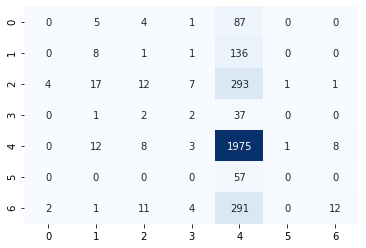

In [21]:
# predicting Test Data 

y_pred = mlpc_enhanced.predict(x_test)
acc= metrics.accuracy_score(y_test,y_pred)

print("=======================")
print("Accuracy: ", acc)
print("=======================")

cm= metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,cbar=False, cmap="Blues",fmt="")

#### F1 Score and Classification Report 

Normally F1 Score is used with 2 Output Classification so it will give and Error when we try to use it here.

In [25]:
#f1=metrics.f1_score(y_test,y_pred)
#print("==============================")
#print("F1 Score : ", f1)

cr= metrics.classification_report(y_test,y_pred) # Classification Report. 
print("==============================")
print("Classification Report : \n",cr)
print("==============================")

Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.18      0.05      0.08       146
           2       0.32      0.04      0.06       335
           3       0.11      0.05      0.07        42
           4       0.69      0.98      0.81      2007
           5       0.00      0.00      0.00        57
           6       0.57      0.04      0.07       321

    accuracy                           0.67      3005
   macro avg       0.27      0.17      0.16      3005
weighted avg       0.57      0.67      0.56      3005



<hr>

### 1.3. K-fold Cross Validation

In [26]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd 

This Will show how to model changes when Dataset Changes in multiple ways.

In [28]:
x=(x-np.min(x))/(np.max(x)-np.min(x))
Knn = KNeighborsClassifier(n_neighbors=5)

scores= cross_val_score(estimator=Knn,X=x, y=y, cv=3)

i=1
for score in scores:
    print("The {}. Score: ".format(i)score)
    i=i+1


print("================================")
print("Average: ", np.mean(scores))
print("================================")

0.6627732854147949
0.6437986818454164
0.5946674655482325
Average:  0.6337464776028147


<hr>

## 2. Keras Classification

### 2.1. Building The model

#### 2.1.1. importing Data

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2 
from sklearn.model_selection import train_test_split

In [29]:
# Importing Data stored before. 
x=np.load("SkinRGB_X.npy")
x=x/255
y=np.load("SkinRGB_Y.npy")
print(x.shape)

(10015, 28, 28, 3)


In [30]:
# Splitting Dataset into Train and test subsets. 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1) # Test group will be 20% of samples


In [31]:
# input shape will be used in the model 
input_shape = x_train.shape[1:]
print(input_shape)

print(x_test.shape)
print(y_test.shape)

(28, 28, 3)
(2003, 28, 28, 3)
(2003,)


#### 2.1.2. Building Process

In [32]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Activation, Conv2D, Dropout , Flatten , MaxPool2D, BatchNormalization

In [33]:
inputs = tf.keras.Input(shape=(28, 28, 3), name='input')

conv1 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, name='conv1')(inputs)
maxpool1 = tf.keras.layers.MaxPooling2D(name='maxpool1')(conv1)

conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, name='conv2')(maxpool1)
maxpool2 = tf.keras.layers.MaxPooling2D(name='maxpool2')(conv2)

conv3 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, name='conv3')(maxpool2)
maxpool3 = tf.keras.layers.MaxPooling2D(name='maxpool3')(conv3)

avgpool = tf.keras.layers.GlobalAveragePooling2D(name='avgpool')(maxpool3)

outputs = tf.keras.layers.Dense(7, activation='softmax', name='output')(avgpool)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 16)        448       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 13, 13, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 32)        4640      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 5, 5, 32)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 3, 3, 64)          18496     
_________________________________________________________________
maxpool3 (MaxPooling2D)      (None, 1, 1, 64)         

In [35]:
# Compiling the Model. 

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
batch_size=32 
epochs=5 

# fitting Data. 

my_model= model.fit(x_train,y_train,epochs=5,validation_split=0.2,batch_size=batch_size)

Epoch 1/5
201/201 [==============================] - 2s 11ms/step - loss: 1.0341 - accuracy: 0.6627 - val_loss: 0.9378 - val_accuracy: 0.6812
Epoch 2/5
201/201 [==============================] - 2s 10ms/step - loss: 0.9246 - accuracy: 0.6770 - val_loss: 0.8835 - val_accuracy: 0.6862
Epoch 3/5
201/201 [==============================] - 2s 10ms/step - loss: 0.8897 - accuracy: 0.6848 - val_loss: 0.8655 - val_accuracy: 0.6912
Epoch 4/5
201/201 [==============================] - 2s 10ms/step - loss: 0.8584 - accuracy: 0.6926 - val_loss: 0.8309 - val_accuracy: 0.6987
Epoch 5/5
201/201 [==============================] - 2s 10ms/step - loss: 0.8175 - accuracy: 0.7059 - val_loss: 0.8145 - val_accuracy: 0.6931


### 2.2. Evaluation of Keras Model Results 

In [36]:
model_acc = model.evaluate(x_test, y_test, verbose=0)[1]

print("========================")
print("Test Accuracy: {:.3f}%".format(model_acc * 100))
print("========================")

Test Accuracy: 69.795%


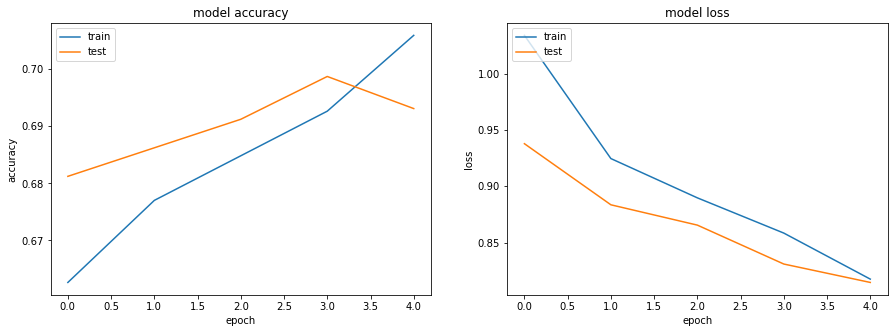

In [47]:
# Plotting Accuracy Values Showing how it changes while Epochs change.

acc = my_model.history['accuracy']
val_acc = my_model.history['val_accuracy']
loss = my_model.history['loss']
val_loss = my_model.history['val_loss']
#print("accuracy : ",acc)
#print("valalidation accuracy :", val_acc )
#print("Loss :", val_acc )
#print("valalidation loss :", val_loss )

# Plot Properties : 

f=plt.figure(figsize=(15,5))
# Accuracy plot 
plt.subplot(1,2,1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


# Loss plot
plt.subplot(1,2,2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()